c:\Users\surya\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


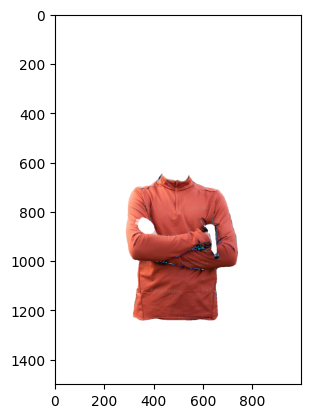

In [70]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation , AutoFeatureExtractor
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from typing import Dict, List, Any
import numpy as np

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
# feature_extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"

image = Image.open(requests.get(url, stream=True).raw)

# encoding = feature_extractor(images=image, return_tensors="pt")
# pixel_values = encoding["pixel_values"]
# with torch.no_grad():
# 	outputs = model(pixel_values=pixel_values)


inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)



logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
	logits,
	size=image.size[::-1],
	mode="bilinear",
	align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

# def createMask(pred_seg , value):
	# output = []
	# for i in pred_seg:
	# 	temp = []
	# 	for j in i:
	# 		if j == value:
	# 			temp.append(1)
	# 		else:
	# 			temp.append(0)
	
	# 	output.append(temp)
	# return output

pred_seg[pred_seg != 4] = 0
pred_seg[pred_seg == 4] = 1

def apply_mask(image, mask):
	# Convert to numpy arrays
	image = np.array(image)
	mask = np.array(mask)
	# Convert grayscale image to RGB
	mask = np.stack((mask,)*3, axis=-1)
	# Multiply arrays
	resultant = image*mask
	for channel in resultant:
		channel[channel == 0] = 255

	return resultant



resultant = apply_mask(image, pred_seg)

plt.imshow(resultant)

c:\Users\surya\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\segformer\feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 